In [607]:
import finesse
finesse.configure(plotting=True)
sm=finesse.Model()
sm.parse("""
l laser P=1 

s s0 laser.p1 md1.p1 L=0
mod md1 midx=0.4 order=1 f=9M
s s2 md1.p2 pr.p1 L=0

m pr R=0.9 T=0.1 phi=104.35
s PRC pr.p2 bs1.p1 L=2
bs bs1 R=0.5 T=0.5 

s Lx bs1.p3 ITMx.p1 L=5.05
m ITMx R=1 T=0 phi=90

s Ly bs1.p2 ITMy.p1 L=4.95
m ITMy R=1 T=0 

ad POP_c pr.p2.o f=0
ad POP_s pr.p2.o f=9M
ad AS_c bs1.p4.o f=0
ad AS_s bs1.p4.o f=9M

pd1 REFL_f1I pr.p1.o f=9M phase=0 
xaxis(ITMy.phi,lin,-180,180,1000)        
""")

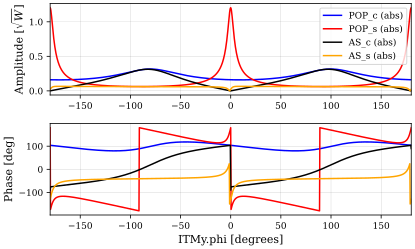

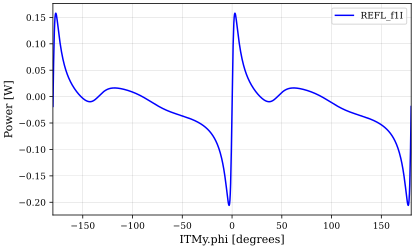

{finesse.detectors.amplitude_detector.AmplitudeDetector: <Figure size 576x355.968 with 2 Axes>,
 'POP_c': <Figure size 576x355.968 with 2 Axes>,
 'POP_s': <Figure size 576x355.968 with 2 Axes>,
 'AS_c': <Figure size 576x355.968 with 2 Axes>,
 'AS_s': <Figure size 576x355.968 with 2 Axes>,
 finesse.detectors.powerdetector.PowerDetectorDemod1: <Figure size 576x355.968 with 1 Axes>,
 'REFL_f1I': <Figure size 576x355.968 with 1 Axes>}

In [608]:
out=sm.run()
out.plot()

In [601]:
sm.parse("""
#pd1 Error bs1.p4.o f=9M
xaxis(pr.phi,lin,-180,180,1000)""")

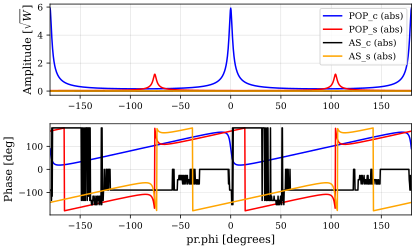

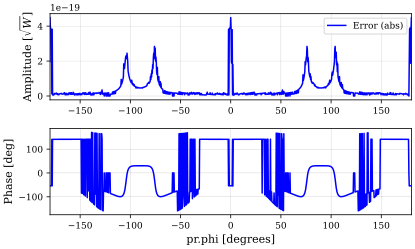

{finesse.detectors.amplitude_detector.AmplitudeDetector: <Figure size 576x355.968 with 2 Axes>,
 'POP_c': <Figure size 576x355.968 with 2 Axes>,
 'POP_s': <Figure size 576x355.968 with 2 Axes>,
 'AS_c': <Figure size 576x355.968 with 2 Axes>,
 'AS_s': <Figure size 576x355.968 with 2 Axes>,
 finesse.detectors.powerdetector.PowerDetectorDemod1: <Figure size 576x355.968 with 2 Axes>,
 'Error': <Figure size 576x355.968 with 2 Axes>}

In [602]:
out=sm.run()
out.plot()